#Problem Context & Explanation

The dataset used can be found on a [kaggle post](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and was used as hypothetical data for Customer Clustering Analysis and Studies using k-mean as the Clustering method

-------
##Dataset Information:

Information of Customers from a Mall with Customer ID, Age, Gender, Annual income and Spending score as attributes.

##Goal:

Cluster Customers based on combinations of attributes to find patterns and understand who can be easily converge, Target Customers, so that the sense can be given to marketing team and plan the strategy accordingly.

## Libraries
pandas

matplotlib

seaborn

scikit-learn

##Algorithms
K-means Clustering

#Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Analysis

Exploratory analysis in this case is just to take a look at the dataset and figure out which attributes have potential for affecting Clustering, how stable they are and how to use them.

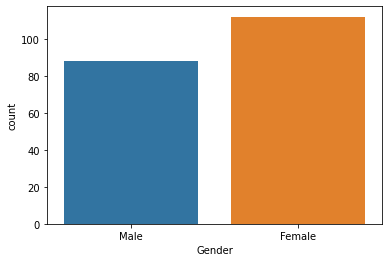

In [11]:
sns.countplot(df['Gender'])

From here there's not much difference in a count of gender, but this will probably affect other attributes later. As it is categorical, it's probably better not to use it with k-mean.

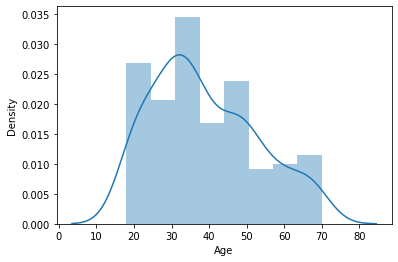

In [12]:
sns.distplot(df['Age'])

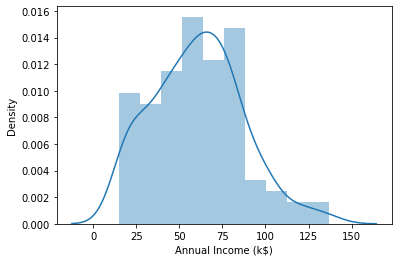

In [15]:
sns.distplot(df['Annual Income (k$)'])

Both attributes above have similar distributions, almost a normal one, so they're probably have some kind of relationship.

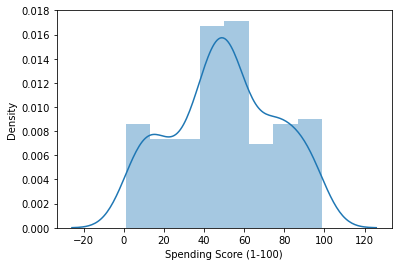

In [14]:
sns.distplot(df['Spending Score (1-100)'])

As this looks at spending score, it's comprehensive that its going to tend to an average with peaks on max and minimum, so nothing much to see.

## Correlation Heatmap

A Correlation Heatmap has the goal of understanding how correlated are the attributes in the dataset, positive values mean a direct relationship between the columns, and negative ones are related to a inversed relationship, when one increases the other decreases. 
As the column *Gender* is categorical, it's not going to be included here.

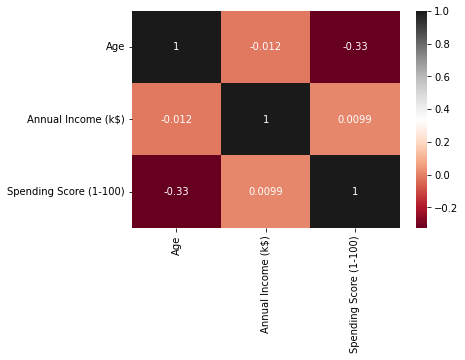

In [88]:
corr = df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='RdGy')

The interesting point here is the negative correlation of age and Spending Score when compared to Annual Income. This shows that even though the expected would be that with more age, and more annual income, resulted in more spending score. But this doesn't happen, the negative factor indicates the opposite.

Taking a look at this specific relationship:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

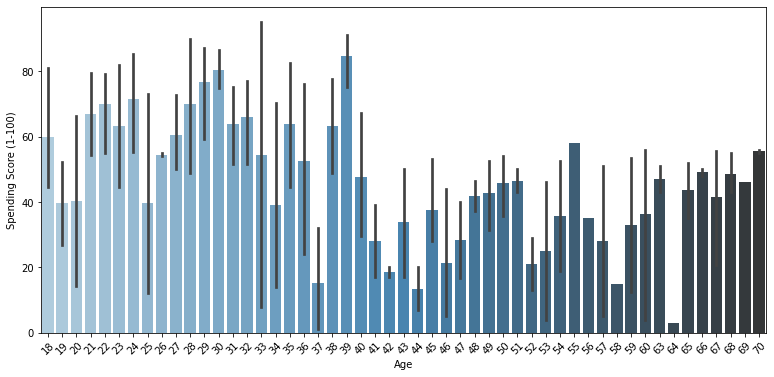

In [94]:
plt.figure(figsize=(13,6))
sns.barplot('Age','Spending Score (1-100)',data=df,palette="Blues_d")
plt.xticks(rotation=45)

There's a big drop after 39, but also there's no direct trend or anything, so the negative correlation low value (close to 0, being -0,33) makes sense. It is negative related, but not that much to have a major correlation trend.

#Clustering

Even though *Annual Income* and *Spending Score* don't show a significant correlation on the heatmap, they are both important financial measures for understanding customer spent and how they are grouped. This is because in Business context, the spending score represents a markdown based on a standard of how much that person spends, and the annual income represents the potential maximum value of that person. So it's important to use them in the clustering structure.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

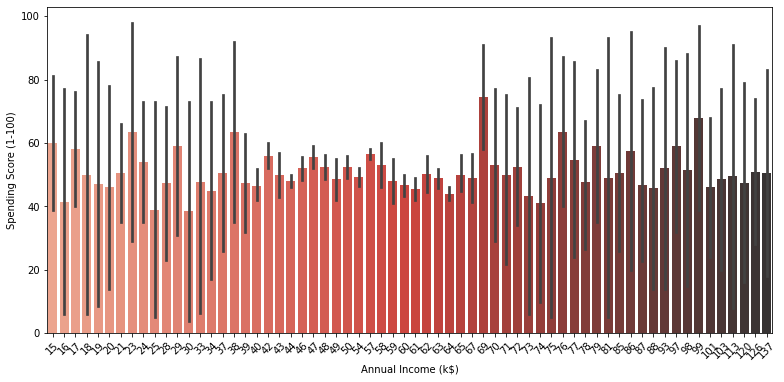

In [95]:
plt.figure(figsize=(13,6))
sns.barplot('Annual Income (k$)','Spending Score (1-100)',data=df,palette="Reds_d")
plt.xticks(rotation=45)

As said, there's no relevant correlation between them when looking at as a bar plot view. But when a scatterplot, to visually find clusters, is plotted the relationship changes and the business view said before comes up.

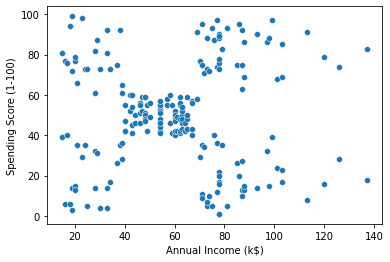

In [28]:
#Clustering 2 initial attributes on a scatterplot
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

The chosen way to Cluster the customers in the plot is K-means. The choice is because it's a fast method for a simple clustering using vector quantization, so in other terms it gets the *n* of samples, in this case datapoints in the scatterplot, and transforms them into *k* clusters based on how close each value is to the average of each *k*.

In [29]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

Before chosing the actual number of clusters based on the k-mean is better to illustrate how it performns from various *n* values with a vertical axis representing the WCSS (Within Cluster Sum of Squares) that the algorithm uses to calculate the relationship between the data and given cluster. In this case it'll be up to 10, ploted in a line as an elbow method.

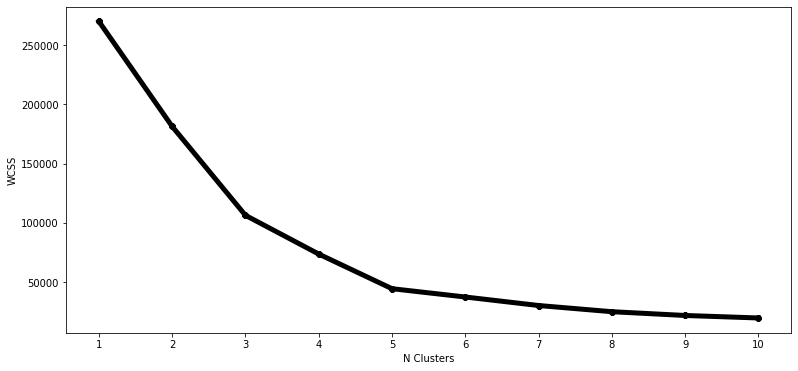

In [49]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=5, color='Black', marker='8')
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

An elbow method is used to see which datapoint gets out of the curve and "forms an elbow" or a "knee of a curve" in the plot. This is used to prevent over-fitting models, because not necessarily the more clusters the better the analysis will be, it can have a lot of attributes and misslead the correlation. So when there's "an elbow" in the curve, it's a form of seeing that > n or < n of clusters will not represent much better segmentation. So the optimial procedure would be go with it, in this case, the elbow can be seen in the value *5*.

In [53]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1['Label'].unique()

array([3, 2, 1, 0, 4], dtype=int32)

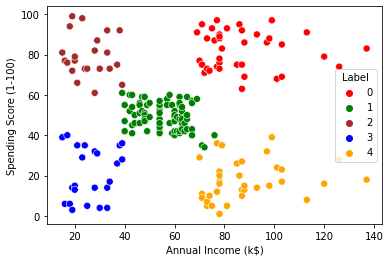

In [79]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

From here the Marketing team already can see useful Clusters for market targetting, but the *Age* attribute can also be useful, so the following is the same process but for a three dimensional correlation and Clusterization.

#3D Clustering

The same procedure follows, but now considering *Age* as another important attribute.

In [80]:
# cluster on 3 features
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [81]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

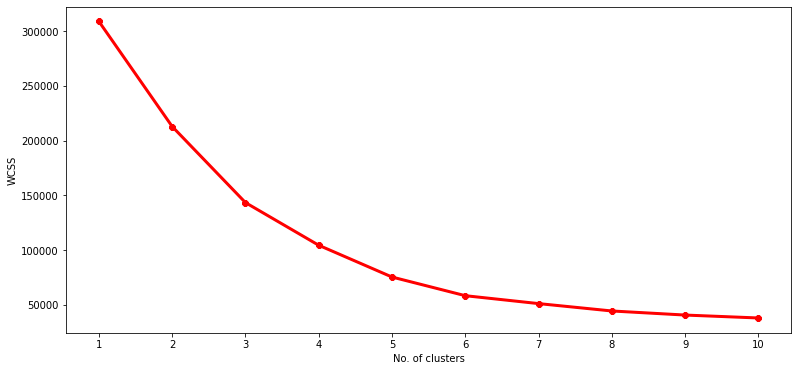

In [82]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [83]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,2
1,15,81,21,4
2,16,6,20,2
3,16,77,23,4
4,17,40,31,2


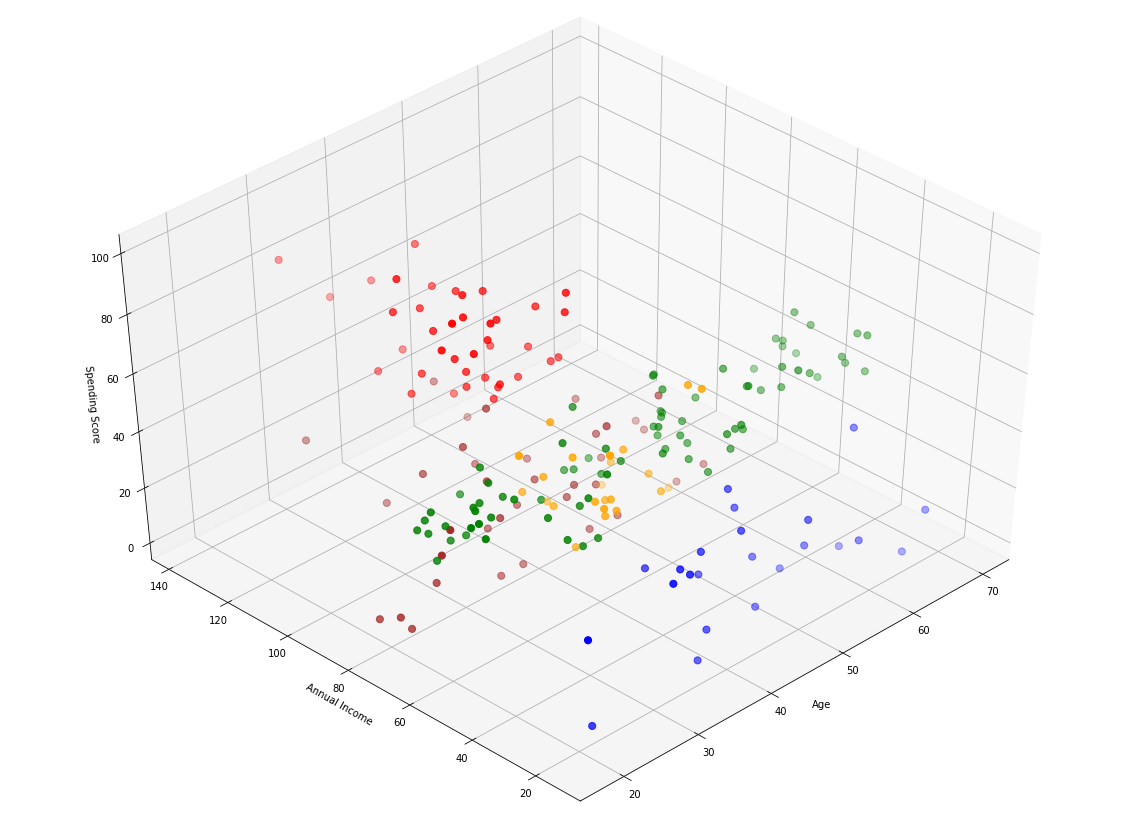

In [118]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(45, 225)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

Browsing through views focused on the 3 attributes, the following can be said:

- The middle Cluster (Green) represents the average value with a higher population, so it might be profitable to focus marketing efforts on them. As they already represet a big part of the historical dataset, the probablity that the CAC (Customer Acquisition Cost) will be lower because of product or market adjustment is higher.
- The same middle Cluster (Green) doesn't represent an outlier on Age terms, it is consistent without a specific age-period with more spending score. But, the one that is visually the Cluster with better spending score is from 20-40 years, with it's mean being the range with more customers.
- When looking at Age related to Annual Income, there's some outliers but the previous age group does not represent a low income value, which can mean that they are a good market approach.